<h1><center>Stratified Sampling</h1>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_ = pd.read_csv('/Users/ARPAN/Downloads/1. Dataset Download/Iris.csv')
df = df_.drop('Id',axis=1)

In [5]:
df = df.sample(frac=1)

test_size = 0.2

splitting_index = int(len(df)*(1-test_size))

train_set = df.iloc[:splitting_index,:]
test_set = df.iloc[splitting_index:,:]

train_x = train_set.iloc[:,:4]
test_x = test_set.iloc[:,:4]
train_y = train_set.iloc[:,-1]
test_y = test_set.iloc[:,-1]

In [6]:
train_set['Species'].value_counts()

Iris-virginica     42
Iris-versicolor    40
Iris-setosa        38
Name: Species, dtype: int64

In [7]:
test_set['Species'].value_counts()

Iris-setosa        12
Iris-versicolor    10
Iris-virginica      8
Name: Species, dtype: int64

In [8]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()

y_pred = NB.fit(train_x,train_y).predict(test_x)

In [9]:
from sklearn import metrics

print('Accuracy score is :', metrics.accuracy_score(test_y, y_pred)*100)
print('Precision score is :', metrics.precision_score(test_y, y_pred,average='weighted')*100)
print('Recall score is :', metrics.recall_score(test_y, y_pred,average='weighted')*100)

Accuracy score is : 93.33333333333333
Precision score is : 94.44444444444446
Recall score is : 93.33333333333333


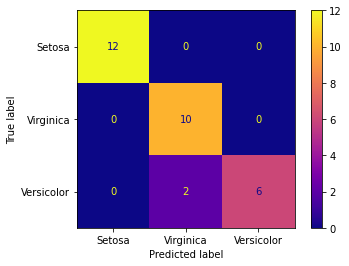

In [10]:
cm = metrics.confusion_matrix(test_y,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Setosa','Virginica','Versicolor'])
cm_display.plot(cmap='plasma')